## Spam classifier

The purpose of this notebook is to build a model that can detect spam in SMS.
For this i'm using the NLP technics for text processing and Naive bayes algorithm for binary classification.
I've taken the particular data set taken from UCI website. 

the processes: 

    *  Reading data 
    
    *  Text processing 
     
    *  Applying ML model
    
    *  Visualize metrics

technics:

    *  Stop key words 

    *  Limmatization

    *  Stemming

    *  Naive bayes


In [158]:
# importing packages
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv("smsspamcollection/SMSSpamcollection", sep = "\t", names = ["Label","Message"])

In [169]:
df

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [161]:
def text_cleaning(sentence):
    #deleting unsual point marks / expressions
    review = re.sub('[^a-zA-Z]', " ", sentence)
    #lowering sentences
    review = review.lower()
    #creating a list of words for each sentence
    words = review.split()
    return words

In [162]:
def stemming(words,language = "english"):
    ps = PorterStemmer()
    stemmed_text = []
    words = [ps.stem(word) for word in words if not word in stopwords.words(language)]
    stemmed_text = (' '.join(words))
    return stemmed_text

In [163]:
def lemmatazation(words,language = "english"):
    wordnet = WordNetLemmatizer()
    lemmatized_text = []
    words = [wordnet.lemmatize(word) for word in words if not word in stopwords.words(language)]
    lemmatized_text = (' '.join(words))
    return lemmatized_text

In [170]:
sms_stemmed = []
sms_lemmatized = []
for sms in df.Message:
    words = text_cleaning(sms)
    #stemming words
    words1 = stemming(words)
    sms_stemmed.append(words1)
    #lemmitazation
    words2 = lemmatazation(words)
    sms_lemmatized.append(words2)

In [171]:
df["stemmed sms"] = sms_stemmed

In [172]:
df["lemmatized sms"] = sms_lemmatized

In [173]:
df

,Label,Message,stemmed sms,lemmatized sms
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,nah think go usf life around though
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tri contact u u pound prize claim easi...,nd time tried contact u u pound prize claim ea...
5568,ham,Will ü b going to esplanade fr home?,b go esplanad fr home,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest,pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...,guy bitching acted like interested buying some...


In [135]:
#Creating bag of words model 
def bagwords(words):
    bagwordsmodel = CountVectorizer(max_features = 5000) #take 5k most frequent words instead of 6295
    vector = bagwordsmodel.fit_transform(words).toarray() # bagging
    #pd.DataFrame(vector) #display vector table
    return vector

In [174]:
pd.DataFrame(bagwords(sms_stemmed))

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
pd.DataFrame(bagwords(sms_lemmatized))

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# Creating a TF-IDF Model
TFIDFmodel = TfidfVectorizer(max_features = 5000) 
XTS = TFIDFmodel.fit_transform(sms_stemmed).toarray()
XTL = TFIDFmodel.fit_transform(sms_lemmatized).toarray()

In [133]:
def TFIDF(words):
    TFIDFmodel = TfidfVectorizer(max_features = 5000) #take 5k most frequent words instead of 6295
    vector = TFIDFmodel.fit_transform(words).toarray() # word to vector using TFIDF
    #pd.DataFrame(vector) #display vector table
    return vector

In [176]:
pd.DataFrame(TFIDF(sms_stemmed))

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
pd.DataFrame(TFIDF(sms_lemmatized))

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# converting the target variable to bool (0 for ham and 1 for spam)
y = pd.get_dummies(df["Label"])
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [178]:
# converting the target variable to bool (0 for ham and 1 for spam)
def get_target(data,target_var):
    y = pd.get_dummies(data[target_var])
    y = y.iloc[:,1].values # at these level ham and spam variables have the same information so we can simply keep one of them
    #pd.DataFrame(y) # display target variable
    return y

In [107]:
# Splitting the dataset
def split_data(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
    return X_train,X_test,y_train,y_test

In [154]:
# training a naive bayes classifier
def train_model(X,y):
    spam_detector_model = MultinomialNB().fit(X,y)
    return spam_detector_model

In [151]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [155]:
def spam_classifier(data,text,target,process,w2v):
        """parameters: 
        data : list of sentences
        process : determine text pre-processing strategy, either 'S' for stemming or 'L' for lemmatization
        w2v : determine the way to transform words to vectors
        
        """
        processed_text = []
        for sentence in data[text]:
            words = text_cleaning(sentence)
            if process == "l":
                processed_text.append(lemmatazation(words))
            elif process == "s":
                processed_text.append(stemming(words))
            else : 
                print("error: unexpected value for process")
                break;
        if w2v == "b":
            X = bagwords(processed_text)
        elif w2v == "t":
            X = TFIDF(processed_text)
        else:
            print('error: unexpected value for w2v')
        y = get_target(data,target)
        X_train,X_test,y_train,y_test = split_data(X,y)
        spam_detector_model = train_model(X_train,y_train)
        y_pred = spam_detector_model.predict(X_test)
        cm = confusion_matrix(y_test,y_pred)
        make_confusion_matrix(cm)

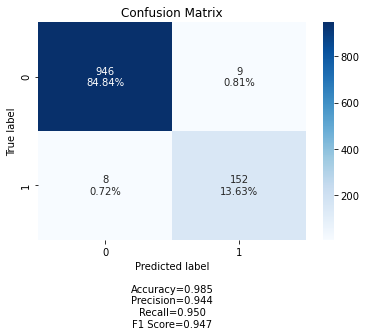

In [179]:
spam_classifier(data = df ,text = "Message",target = "Label",process = "s",w2v = "b")

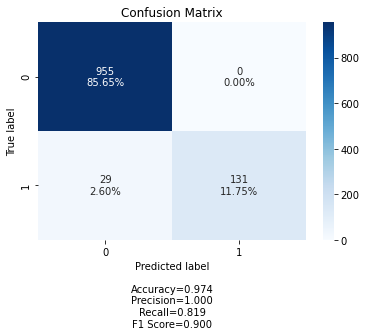

In [180]:
spam_classifier(data = df ,text = "Message",target = "Label",process = "s",w2v = "t")

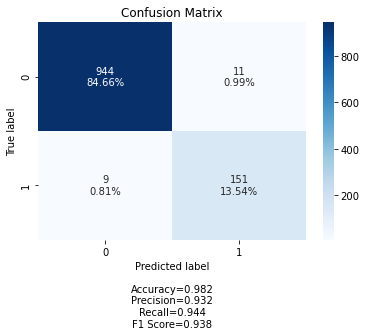

In [181]:
spam_classifier(data = df ,text = "Message",target = "Label",process = "l",w2v = "b")

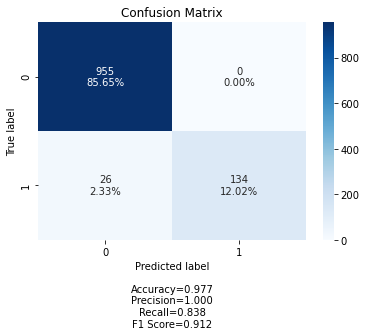

In [182]:
spam_classifier(data = df ,text = "Message",target = "Label",process = "l",w2v = "t")